In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datetime import datetime
import calendar
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [95]:
df = pd.read_csv("../data/madrid/concat_clim.csv")
df_estaciones = pd.read_csv("../data/madrid/Estaciones_control_datos_meteorologicos.csv")

In [96]:
df_estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CÓDIGO               26 non-null     int64  
 1   CÓDIGO_CORTO         26 non-null     int64  
 2   ESTACIÓN             26 non-null     object 
 3   DIRECCION            26 non-null     object 
 4   LONGITUD_ETRS89      26 non-null     object 
 5   LATITUD_ETRS89       26 non-null     object 
 6   ALTITUD              26 non-null     int64  
 7   VV (81)              10 non-null     object 
 8   DV (82)              10 non-null     object 
 9   T (83)               25 non-null     object 
 10  HR (86)              23 non-null     object 
 11  PB (87)              8 non-null      object 
 12  RS (88)              8 non-null      object 
 13  P (89)               10 non-null     object 
 14  COD_VIA              25 non-null     float64
 15  VIA_CLASE            26 non-null     objec

In [10]:
df_estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CÓDIGO               26 non-null     int64  
 1   CÓDIGO_CORTO         26 non-null     int64  
 2   ESTACIÓN             26 non-null     object 
 3   DIRECCION            26 non-null     object 
 4   LONGITUD_ETRS89      26 non-null     object 
 5   LATITUD_ETRS89       26 non-null     object 
 6   ALTITUD              26 non-null     int64  
 7   VV (81)              10 non-null     object 
 8   DV (82)              10 non-null     object 
 9   T (83)               25 non-null     object 
 10  HR (86)              23 non-null     object 
 11  PB (87)              8 non-null      object 
 12  RS (88)              8 non-null      object 
 13  P (89)               10 non-null     object 
 14  COD_VIA              25 non-null     float64
 15  VIA_CLASE            26 non-null     objec

In [11]:
df

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,102,VELOCIDAD VIENTO,28079102_81_98,2019,1,1,0.65,V,...,0.43,V,0.58,V,0.38,V,0.67,V,0.18,V
1,28,79,102,VELOCIDAD VIENTO,28079102_81_98,2019,1,2,0.50,V,...,0.53,V,1.13,V,2.02,V,3.48,V,2.82,V
2,28,79,102,VELOCIDAD VIENTO,28079102_81_98,2019,1,3,2.22,V,...,0.50,V,2.02,V,1.33,V,0.83,V,0.67,V
3,28,79,102,VELOCIDAD VIENTO,28079102_81_98,2019,1,4,0.87,V,...,0.13,V,0.58,V,0.92,V,0.20,V,0.33,V
4,28,79,102,VELOCIDAD VIENTO,28079102_81_98,2019,1,5,0.57,V,...,0.47,V,0.32,V,0.30,V,0.23,V,0.45,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124498,28,79,59,PRECIPITACIÓN,28079059_89_98,2022,12,27,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
124499,28,79,59,PRECIPITACIÓN,28079059_89_98,2022,12,28,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
124500,28,79,59,PRECIPITACIÓN,28079059_89_98,2022,12,29,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
124501,28,79,59,PRECIPITACIÓN,28079059_89_98,2022,12,30,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V


In [12]:
df.drop(["PUNTO_MUESTREO","PROVINCIA","MUNICIPIO","V01","V02","V03","V04","V05","V06","V07","V08","V09","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24"],axis=1,inplace=True)

In [13]:
df["ESTACION"]

0         102
1         102
2         102
3         102
4         102
         ... 
124498     59
124499     59
124500     59
124501     59
124502     59
Name: ESTACION, Length: 124503, dtype: int64

In [14]:
dict_est = {4:"Plaza España",8:"Escuelas Aguirre",16:"Arturo Soria",18:"Farolillo",24:"Casa de Campo",35:"Plaza del Carmen",36:"Moratalaz",38:"Cuatro Caminos",39:"Barrio del Pilar",54:"Ensanche de Vallecas",56:"Plaza Elíptica",58:"El Pardo",59:"Juan Carlos I",102:"J.M.D. Moratalaz",103:"J.M.D. Villaverde",104:"E.D.A.R. La China",106:"Centro Mpal. De Acústica",107:"J.M.D. Hortaleza",108:"Peñagrande",109:"J.M.D.Chamberí",110:"J.M.D.Centro",111:"J.M.D.Chamartin",112:"J.M.D.Vallecas 1",113:"J.M.D.Vallecas 2",114:"Matadero 01",115:"Matadero 02"}

In [15]:
df['ESTACION'] = df['ESTACION'].map(dict_est)

In [16]:
df

,ESTACION,MAGNITUD,ANO,MES,DIA,H01,H02,H03,H04,H05,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,J.M.D. Moratalaz,VELOCIDAD VIENTO,2019,1,1,0.65,0.95,0.87,0.73,0.57,...,0.77,0.35,0.98,0.47,0.37,0.43,0.58,0.38,0.67,0.18
1,J.M.D. Moratalaz,VELOCIDAD VIENTO,2019,1,2,0.50,0.95,0.60,0.73,1.62,...,0.52,0.50,0.57,0.80,0.88,0.53,1.13,2.02,3.48,2.82
2,J.M.D. Moratalaz,VELOCIDAD VIENTO,2019,1,3,2.22,2.53,2.20,2.43,1.90,...,0.82,1.12,0.77,0.43,0.25,0.50,2.02,1.33,0.83,0.67
3,J.M.D. Moratalaz,VELOCIDAD VIENTO,2019,1,4,0.87,0.77,0.87,0.92,0.65,...,0.48,0.28,0.68,0.47,0.40,0.13,0.58,0.92,0.20,0.33
4,J.M.D. Moratalaz,VELOCIDAD VIENTO,2019,1,5,0.57,1.82,1.65,0.55,0.58,...,0.68,0.87,0.60,0.45,0.60,0.47,0.32,0.30,0.23,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124498,Juan Carlos I,PRECIPITACIÓN,2022,12,27,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
124499,Juan Carlos I,PRECIPITACIÓN,2022,12,28,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
124500,Juan Carlos I,PRECIPITACIÓN,2022,12,29,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
124501,Juan Carlos I,PRECIPITACIÓN,2022,12,30,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [17]:
df["MAGNITUD"].unique()

array(['VELOCIDAD VIENTO', 'DIR. DE VIENTO', 'TEMPERATURA',
       'HUMEDAD RELATIVA', 'PRESION BARIOMETRICA', 'RADIACION SOLAR',
       'PRECIPITACIÓN', '80'], dtype=object)

Solo dejamos de magnitud temperatura para analizar los proceso por los que pasa la temperatura. 

In [18]:
df_temperatura = df.loc[df['MAGNITUD'] == 'TEMPERATURA']

In [19]:
df_temperatura

,ESTACION,MAGNITUD,ANO,MES,DIA,H01,H02,H03,H04,H05,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
62,J.M.D. Moratalaz,TEMPERATURA,2019,1,1,3.1,2.9,3.1,1.9,0.7,...,10.4,11.9,10.1,8.5,7.7,7.1,6.6,5.8,4.1,3.4
63,J.M.D. Moratalaz,TEMPERATURA,2019,1,2,2.3,1.8,0.9,-0.2,-1.1,...,10.6,11.7,11.5,9.9,8.7,8.2,7.4,5.4,4.6,3.9
64,J.M.D. Moratalaz,TEMPERATURA,2019,1,3,3.0,2.8,2.0,2.0,1.6,...,9.9,9.7,9.7,8.6,8.1,7.4,6.0,4.6,3.9,3.4
65,J.M.D. Moratalaz,TEMPERATURA,2019,1,4,2.1,1.5,1.0,0.7,0.1,...,10.9,11.7,10.5,8.8,6.9,6.2,5.7,4.7,4.1,3.4
66,J.M.D. Moratalaz,TEMPERATURA,2019,1,5,1.8,0.1,-0.6,-0.4,-0.3,...,9.5,10.6,10.7,9.1,7.1,6.3,5.7,4.1,4.2,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124374,Juan Carlos I,TEMPERATURA,2022,12,27,7.2,6.5,6.0,5.5,5.0,...,14.2,14.9,15.0,13.7,11.0,10.1,10.0,8.5,7.5,6.6
124375,Juan Carlos I,TEMPERATURA,2022,12,28,5.7,5.6,5.1,4.7,4.3,...,13.4,13.2,13.5,12.5,11.8,11.1,10.8,10.3,10.3,10.5
124376,Juan Carlos I,TEMPERATURA,2022,12,29,10.1,9.5,9.1,8.5,8.5,...,11.4,11.4,11.3,11.5,11.2,11.0,10.9,10.4,11.0,11.1
124377,Juan Carlos I,TEMPERATURA,2022,12,30,11.2,11.3,11.0,11.0,10.9,...,13.0,12.9,12.5,12.3,11.6,11.3,11.0,10.0,9.7,8.4


Ahora sacamos un df para cada estación.

In [20]:
df_temperatura_plz_esp = df.loc[df['ESTACION'] == "Plaza España"]
df_temperatura_esc_agu = df.loc[df['ESTACION'] == 'Escuelas Aguirre']
df_temperatura_art_soria = df.loc[df['ESTACION'] == "Arturo Soria"]
df_temperatura_farolillo = df.loc[df['ESTACION'] == "Farolillo"]
df_temperatura_casa_campo = df.loc[df['ESTACION'] == "Casa de Campo"]
df_temperatura_plaza_carmen = df.loc[df['ESTACION'] == "Plaza del Carmen"]
df_temperatura_moratalaz = df.loc[df['ESTACION'] == "Moratalaz"]
df_temperatura_cuatro_caminos = df.loc[df['ESTACION'] == "Cuatro Caminos"]
df_temperatura_barrio_pilar = df.loc[df['ESTACION'] == "Barrio del Pilar"]
df_temperatura_ensanche_vall = df.loc[df['ESTACION'] == "Ensanche de Vallecas"]
df_temperatura_plaza_elip = df.loc[df['ESTACION'] == "Plaza Elíptica"]
df_temperatura_pardo = df.loc[df['ESTACION'] == "El Pardo"]
df_temperatura_jcprimero = df.loc[df['ESTACION'] == "Juan Carlos I"]
df_temperatura_moratalaz = df.loc[df['ESTACION'] == "J.M.D. Moratalaz"]
df_temperatura_villaverde = df.loc[df['ESTACION'] == "J.M.D. Villaverde"]
df_temperatura_china = df.loc[df['ESTACION'] == "E.D.A.R. La China"]
df_temperatura_acustica = df.loc[df['ESTACION'] == "Centro Mpal. De Acústica"]
df_temperatura_hortaleza = df.loc[df['ESTACION'] == "J.M.D. Hortaleza"]
df_temperatura_penagrande = df.loc[df['ESTACION'] == "Peñagrande"]
df_temperatura_chamberi = df.loc[df['ESTACION'] == "J.M.D.Chamberí"]
df_temperatura_centro = df.loc[df['ESTACION'] == "J.M.D.Centro"]
df_temperatura_chamartin = df.loc[df['ESTACION'] == "J.M.D.Chamartin"]
df_temperatura_vallecas_1 = df.loc[df['ESTACION'] == "J.M.D.Vallecas 1"]
df_temperatura_vallecas_2 = df.loc[df['ESTACION'] == "J.M.D.Vallecas 2"]
df_temperatura_matadero_1 = df.loc[df['ESTACION'] == "Matadero 01"]
df_temperatura_matadero_2 = df.loc[df['ESTACION'] == "Matadero 02"]


In [21]:
df_temperatura_plz_esp.reset_index(drop=True, inplace=True)
df_temperatura_esc_agu.reset_index(drop=True, inplace=True)
df_temperatura_art_soria.reset_index(drop=True, inplace=True)
df_temperatura_farolillo.reset_index(drop=True, inplace=True)
df_temperatura_casa_campo.reset_index(drop=True, inplace=True)
df_temperatura_plaza_carmen.reset_index(drop=True, inplace=True)
df_temperatura_moratalaz.reset_index(drop=True, inplace=True)
df_temperatura_cuatro_caminos.reset_index(drop=True, inplace=True)
df_temperatura_barrio_pilar.reset_index(drop=True, inplace=True)
df_temperatura_ensanche_vall.reset_index(drop=True, inplace=True)
df_temperatura_plaza_elip.reset_index(drop=True, inplace=True)
df_temperatura_pardo.reset_index(drop=True, inplace=True)
df_temperatura_jcprimero.reset_index(drop=True, inplace=True)
df_temperatura_moratalaz.reset_index(drop=True, inplace=True)
df_temperatura_villaverde.reset_index(drop=True, inplace=True)
df_temperatura_china.reset_index(drop=True, inplace=True)
df_temperatura_acustica.reset_index(drop=True, inplace=True)
df_temperatura_hortaleza.reset_index(drop=True, inplace=True)
df_temperatura_penagrande.reset_index(drop=True, inplace=True)
df_temperatura_chamberi.reset_index(drop=True, inplace=True)
df_temperatura_centro.reset_index(drop=True, inplace=True)
df_temperatura_chamartin.reset_index(drop=True, inplace=True)
df_temperatura_vallecas_1.reset_index(drop=True, inplace=True)
df_temperatura_vallecas_2.reset_index(drop=True, inplace=True)
df_temperatura_matadero_1.reset_index(drop=True, inplace=True)
df_temperatura_matadero_2.reset_index(drop=True, inplace=True)



In [22]:
df_temperatura_plz_esp

,ESTACION,MAGNITUD,ANO,MES,DIA,H01,H02,H03,H04,H05,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,Plaza España,TEMPERATURA,2019,1,1,1.1,0.4,-0.1,-0.5,-0.9,...,13.8,15.8,15.7,12.9,10.1,8.6,6.0,3.7,2.3,1.0
1,Plaza España,TEMPERATURA,2019,1,2,0.7,-0.2,-0.9,-1.1,-2.0,...,13.4,15.3,17.0,13.2,10.6,8.3,4.9,3.6,2.6,0.6
2,Plaza España,TEMPERATURA,2019,1,3,0.0,0.1,-0.8,-0.9,-1.3,...,13.4,14.5,14.3,12.4,10.5,8.0,5.4,3.6,2.6,1.5
3,Plaza España,TEMPERATURA,2019,1,4,0.7,-0.1,-0.7,-1.0,-1.3,...,13.2,15.0,15.5,13.1,10.5,8.5,5.6,2.8,2.1,0.6
4,Plaza España,TEMPERATURA,2019,1,5,-0.1,-0.6,-1.4,-1.9,-2.3,...,12.6,14.4,16.3,13.1,10.3,8.3,5.2,3.2,2.1,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,Plaza España,TEMPERATURA,2022,12,27,6.2,5.5,4.7,4.3,4.0,...,17.4,18.7,17.8,15.3,14.6,12.7,10.0,8.2,6.9,6.1
1205,Plaza España,TEMPERATURA,2022,12,28,5.2,4.8,4.3,3.4,3.0,...,16.5,17.5,16.3,14.1,12.9,12.2,11.6,10.7,10.9,10.6
1206,Plaza España,TEMPERATURA,2022,12,29,11.1,10.9,10.3,9.7,9.6,...,11.5,11.8,12.1,12.1,11.8,11.8,11.7,11.4,11.7,11.8
1207,Plaza España,TEMPERATURA,2022,12,30,11.9,11.9,11.5,11.5,11.5,...,13.7,13.6,13.6,13.0,12.4,12.2,11.8,11.4,11.1,10.6


In [23]:
df_temperatura_plz_esp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ESTACION  1209 non-null   object 
 1   MAGNITUD  1209 non-null   object 
 2   ANO       1209 non-null   int64  
 3   MES       1209 non-null   int64  
 4   DIA       1209 non-null   int64  
 5   H01       1209 non-null   float64
 6   H02       1209 non-null   float64
 7   H03       1209 non-null   float64
 8   H04       1209 non-null   float64
 9   H05       1209 non-null   float64
 10  H06       1209 non-null   float64
 11  H07       1209 non-null   float64
 12  H08       1209 non-null   float64
 13  H09       1209 non-null   float64
 14  H10       1209 non-null   float64
 15  H11       1209 non-null   float64
 16  H12       1209 non-null   float64
 17  H13       1209 non-null   float64
 18  H14       1209 non-null   float64
 19  H15       1209 non-null   float64
 20  H16       1209 non-null   floa

Conversión a datetime de todas las columnas solo dejando la columna de temperatura para poder funcionar con ella

In [43]:
# Funciones para poder poner todos los df con la misma estructura
def format_fecha(row):
    try:
        fecha_str = f"{row['ANO']}-{row['MES']:02d}-{row['DIA']:02d}-{int(row['HORA'][1:]):02d}"
        if row['HORA'] == 'H24':
            # Verificar si el día es el último día del mes
            ultimo_dia_del_mes = calendar.monthrange(row['ANO'], row['MES'])[1]
            if row['DIA'] == ultimo_dia_del_mes:
                fecha_str = f"{row['ANO']}-{row['MES']:02d}-{row['DIA']:02d}-00"
            else:
                fecha_str = f"{row['ANO']}-{row['MES']:02d}-{row['DIA']+1:02d}-00"
        return pd.to_datetime(fecha_str, format='%Y-%m-%d-%H')
    except ValueError:
        return pd.NaT

def procesar_temperaturas(df):
    columnas_horas = [f'H{i:02}' for i in range(1, 25)]

    data_melted = pd.melt(df, id_vars=['ESTACION', 'MAGNITUD', 'ANO', 'MES', 'DIA'], value_vars=columnas_horas, var_name='HORA', value_name='TEMPERATURA')
    data_melted['Fecha'] = data_melted.apply(format_fecha, axis=1)
    data_melted = data_melted.drop(columns=['ANO', 'MES', 'DIA', 'HORA'])
    data_melted = data_melted.sort_values(by='Fecha')
    data_melted = data_melted.rename(columns={'Fecha': 'FECHA'})
    cols = data_melted.columns.tolist()
    cols = ['FECHA'] + [col for col in cols if col != 'FECHA']
    data_melted = data_melted[cols]
    data_melted.loc[data_melted['TEMPERATURA'] < -20, 'TEMPERATURA'] = 0

    return data_melted

In [44]:
df_plz_esp = procesar_temperaturas(df_temperatura_plz_esp)
df_esc_agu = procesar_temperaturas(df_temperatura_esc_agu)
df_art_soria = procesar_temperaturas(df_temperatura_art_soria)
df_farolillo = procesar_temperaturas(df_temperatura_farolillo)
df_casa_campo = procesar_temperaturas(df_temperatura_casa_campo)
df_plaza_carmen = procesar_temperaturas(df_temperatura_plaza_carmen)
df_moratalaz = procesar_temperaturas(df_temperatura_moratalaz)
df_cuatro_caminos = procesar_temperaturas(df_temperatura_cuatro_caminos)
df_barrio_pilar = procesar_temperaturas(df_temperatura_barrio_pilar)
df_ensanche_vall = procesar_temperaturas(df_temperatura_ensanche_vall)
df_plaza_elip = procesar_temperaturas(df_temperatura_plaza_elip)
df_pardo = procesar_temperaturas(df_temperatura_pardo)
df_jcprimero = procesar_temperaturas(df_temperatura_jcprimero)
df_moratalaz = procesar_temperaturas(df_temperatura_moratalaz)
df_villaverde = procesar_temperaturas(df_temperatura_villaverde)
df_china = procesar_temperaturas(df_temperatura_china)
df_acustica = procesar_temperaturas(df_temperatura_acustica)
df_hortaleza = procesar_temperaturas(df_temperatura_hortaleza)
df_penagrande = procesar_temperaturas(df_temperatura_penagrande)
df_chamberi = procesar_temperaturas(df_temperatura_chamberi)
df_centro = procesar_temperaturas(df_temperatura_centro)
df_chamartin = procesar_temperaturas(df_temperatura_chamartin)
df_plz_esp = procesar_temperaturas(df_temperatura_plz_esp)
df_vallecas_1 = procesar_temperaturas(df_temperatura_vallecas_1)
df_vallecas_2 = procesar_temperaturas(df_temperatura_vallecas_2)
df_matadero_1 = procesar_temperaturas(df_temperatura_matadero_1)
df_matadero_2 = procesar_temperaturas(df_temperatura_matadero_2)

In [47]:
df_plz_esp.to_csv("../data/temp_ok/plz_esp.csv", index=False)
df_esc_agu.to_csv("../data/temp_ok/esc_agu.csv", index=False)
df_art_soria.to_csv("../data/temp_ok/art_soria.csv", index=False)
df_farolillo.to_csv("../data/temp_ok/farolillo.csv", index=False)
df_casa_campo.to_csv("../data/temp_ok/casa_campo.csv", index=False)
df_plaza_carmen.to_csv("../data/temp_ok/plaza_carmen.csv", index=False)
df_moratalaz.to_csv("../data/temp_ok/moratalaz.csv", index=False)
df_cuatro_caminos.to_csv("../data/temp_ok/cuatro_caminos.csv", index=False)
df_barrio_pilar.to_csv("../data/temp_ok/barrio_pilar.csv", index=False)
df_ensanche_vall.to_csv("../data/temp_ok/ensanche_vall.csv", index=False)
df_plaza_elip.to_csv("../data/temp_ok/plaza_elip.csv", index=False)
df_pardo.to_csv("../data/temp_ok/pardo.csv", index=False)
df_jcprimero.to_csv("../data/temp_ok/jcprimero.csv", index=False)
df_moratalaz.to_csv("../data/temp_ok/moratalaz.csv", index=False)
df_villaverde.to_csv("../data/temp_ok/villaverde.csv", index=False)
df_china.to_csv("../data/temp_ok/china.csv", index=False)
df_acustica.to_csv("../data/temp_ok/acustica.csv", index=False)
df_hortaleza.to_csv("../data/temp_ok/hortalez.csv", index=False)
df_penagrande.to_csv("../data/temp_ok/penagrande.csv", index=False)
df_chamberi.to_csv("../data/temp_ok/chamberi.csv", index=False)
df_centro.to_csv("../data/temp_ok/centro.csv", index=False)
df_chamartin.to_csv("../data/temp_ok/chamartin.csv", index=False)
df_vallecas_1.to_csv("../data/temp_ok/vallecas_1.csv", index=False)
df_vallecas_2.to_csv("../data/temp_ok/vallecas_2.csv", index=False)
df_matadero_1.to_csv("../data/temp_ok/matadero_1.csv", index=False)
df_matadero_2.to_csv("../data/temp_ok/matadero_2.csv", index=False)

De todas las estaciones las que tienen mas sentido para hacer un modelo de machine learning serian la estacion de farolillo y plaza de españa

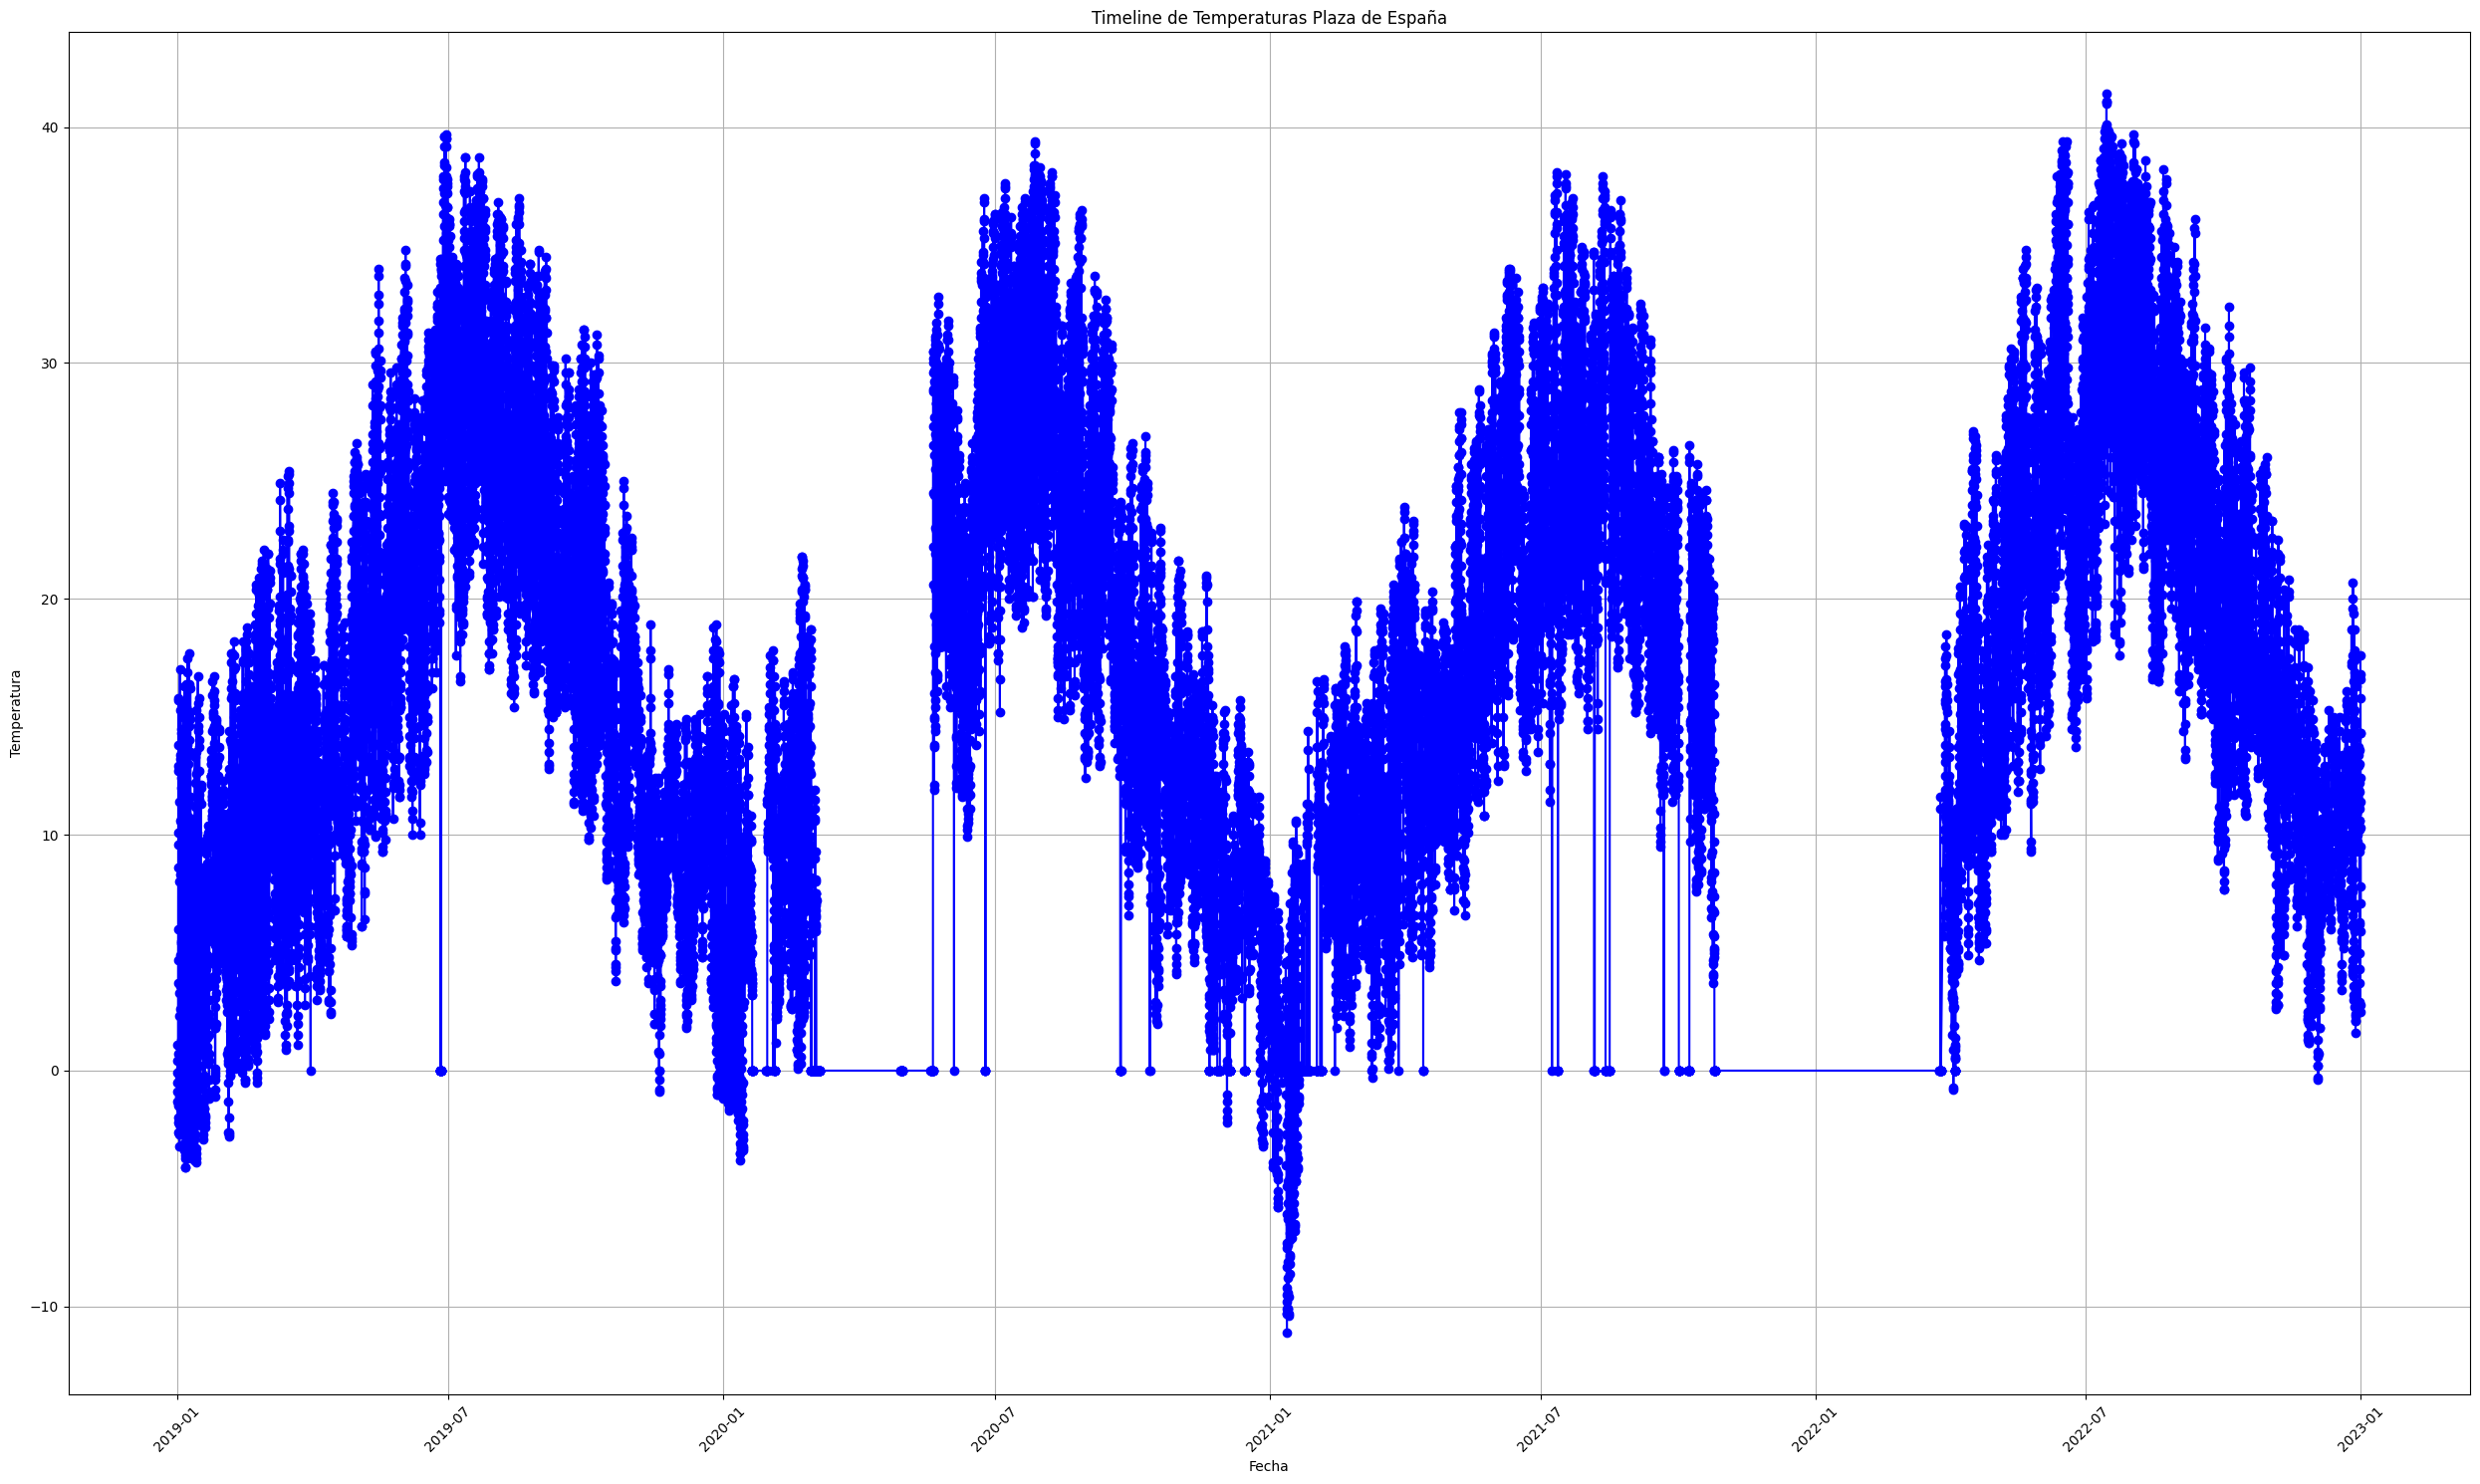

In [80]:
plt.figure(figsize=(25, 15))
plt.plot(df_plz_esp['FECHA'], df_plz_esp['TEMPERATURA'], marker='o', linestyle='-', color='b')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.title('Timeline de Temperaturas Plaza de España')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

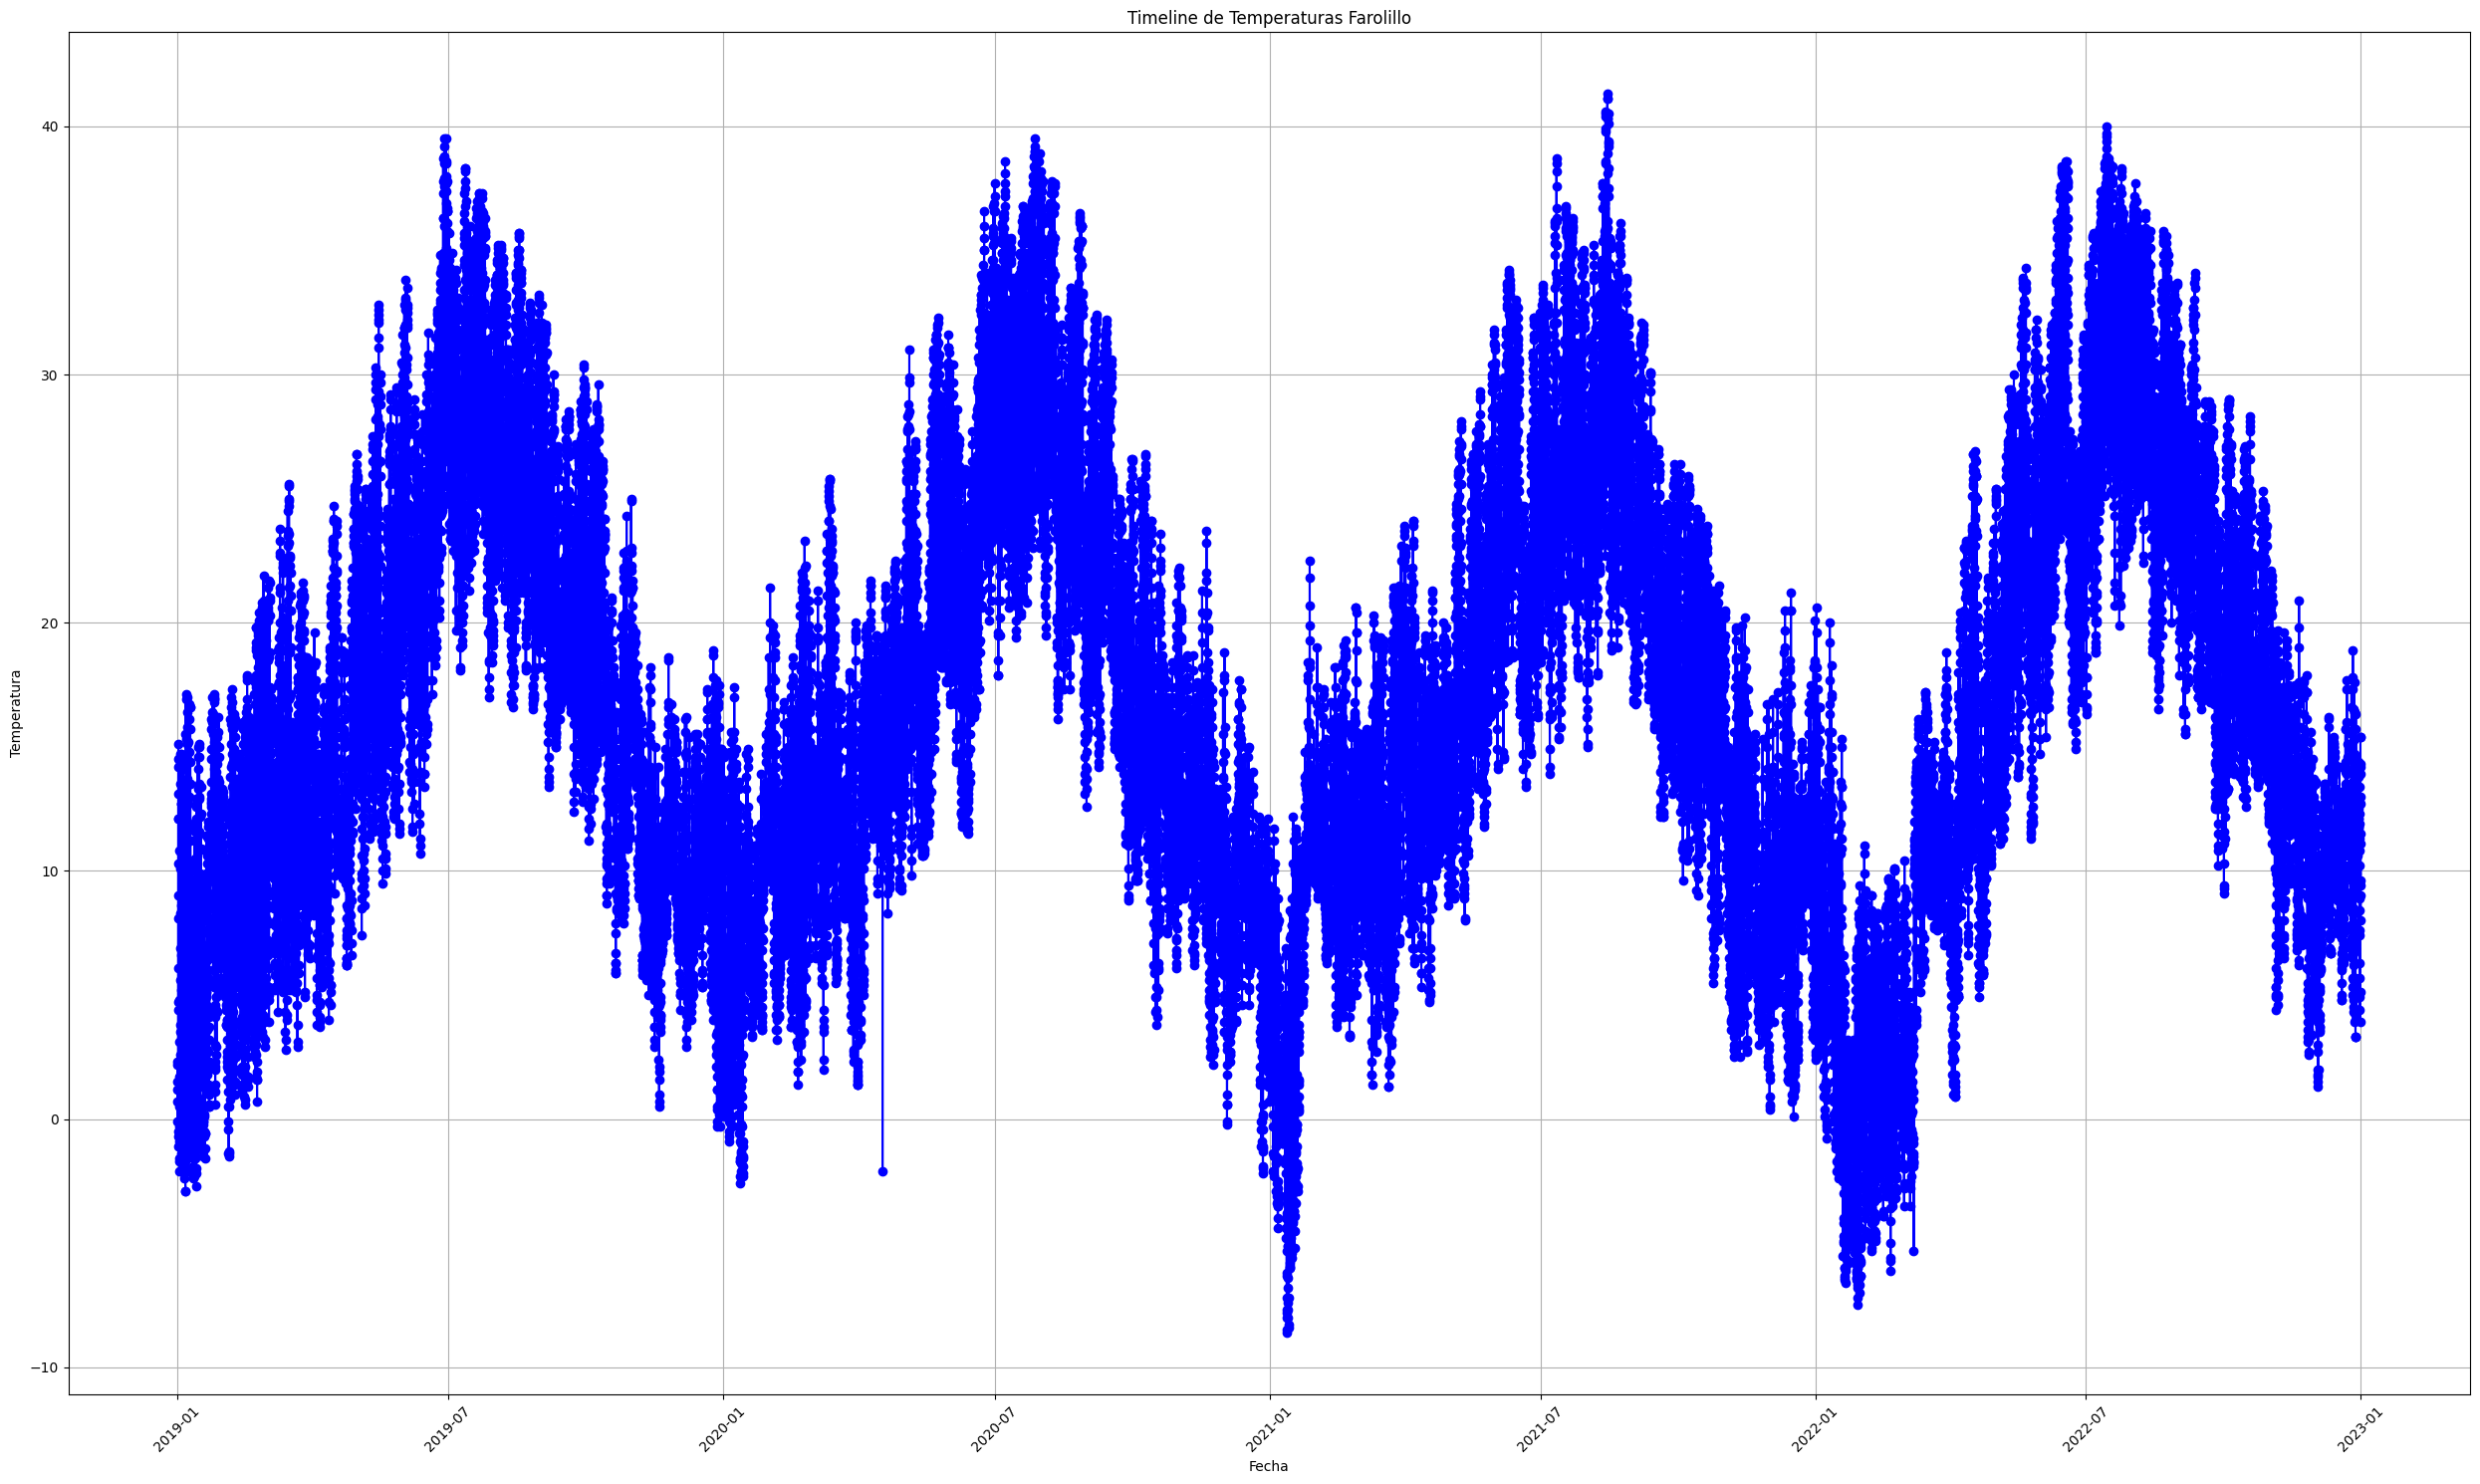

In [13]:
plt.figure(figsize=(25, 15))
plt.plot(df_farolillo['FECHA'], df_farolillo['TEMPERATURA'], marker='o', linestyle='-', color='b')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.title('Timeline de Temperaturas Farolillo')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
df_farolillo = pd.read_csv("../data/temp_ok/farolillo.csv")

In [48]:
df_farolillo['FECHA'] = pd.to_datetime(df_farolillo['FECHA'])

In [49]:
df_farolillo.drop(columns=['ESTACION','MAGNITUD'], inplace=True)

In [69]:
df_farolillo["TEMPERATURA"].min()

-8.6

In [70]:
df_farolillo["TEMPERATURA"].max()

41.3

Intentamos quitar outliners del DF de farolillo

In [50]:
df_farolillo.loc[df_farolillo["TEMPERATURA"] < -10, "TEMPERATURA"] = 0

In [51]:
df_farolillo["TEMPERATURA"] = df_farolillo["TEMPERATURA"].replace(0, method='bfill')

In [ ]:
df_farolillo['AÑO'] = df_farolillo['FECHA'].dt.year
df_farolillo['MES'] = df_farolillo['FECHA'].dt.month
df_farolillo['DIA'] = df_farolillo['FECHA'].dt.day
df_farolillo['HORA'] = df_farolillo['FECHA'].dt.hour

In [64]:
df_farolillo.head()

,TEMPERATURA,AÑO,MES,DIA,HORA
0,2.3,2019,1,1,1
1,2.2,2019,1,1,2
2,1.5,2019,1,1,3
3,1.2,2019,1,1,4
4,0.7,2019,1,1,5


In [66]:
X = df_farolillo.drop(columns=['TEMPERATURA'])
y = df_farolillo['TEMPERATURA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R^2):', r2)


Error cuadrático medio (MSE): 1.6488847509898676
Coeficiente de determinación (R^2): 0.9791467480261332


In [62]:
df_farolillo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TEMPERATURA  35064 non-null  float64
 1   AÑO          35064 non-null  int32  
 2   MES          35064 non-null  int32  
 3   DIA          35064 non-null  int32  
 4   HORA         35064 non-null  int32  
dtypes: float64(1), int32(4)
memory usage: 821.9 KB


In [86]:
fecha_hora_prediccion = pd.to_datetime('2023-07-26 20:00:00')
año = fecha_hora_prediccion.year
mes = fecha_hora_prediccion.month
dia = fecha_hora_prediccion.day
hora = fecha_hora_prediccion.hour


prediccion = model.predict([[año, mes, dia, hora]])
print('Predicción de temperatura:', round(prediccion[0],2))

Predicción de temperatura: 34.25


c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [9]:
df_farolillo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        35064 non-null  datetime64[ns]
 1   TEMPERATURA  35064 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 548.0 KB


Aplicando modelo de ML ARIMA a farolillo

In [10]:
df_farolillo.reset_index(drop=True, inplace=True)

In [11]:
df_farolillo.head()

,FECHA,TEMPERATURA
0,2019-01-01 01:00:00,2.3
1,2019-01-01 02:00:00,2.2
2,2019-01-01 03:00:00,1.5
3,2019-01-01 04:00:00,1.2
4,2019-01-01 05:00:00,0.7


In [12]:
from pmdarima.arima import auto_arima, ARIMA

In [13]:
df_farolillo.set_index('FECHA', inplace=True)

In [27]:
df_farolillo

,TEMPERATURA
FECHA,
2019-01-01 01:00:00,2.3
2019-01-01 02:00:00,2.2
2019-01-01 03:00:00,1.5
2019-01-01 04:00:00,1.2
2019-01-01 05:00:00,0.7
...,...
2022-12-31 19:00:00,12.7
2022-12-31 20:00:00,11.1
2022-12-31 21:00:00,9.6


otra prueba

In [14]:
train = df_farolillo.iloc[:25000,]
test = df_farolillo.iloc[25000:,]

In [15]:
print(train.shape)
print(test.shape)

(25000, 1)
(10064, 1)


In [16]:
from pmdarima.arima import auto_arima, ARIMA

In [17]:
model = auto_arima(train,
                   start_p = 1,
                   start_q = 1,
                   max_p = 5,
                   max_q = 5,
                   max_d = 3,
                   stationary=False,
                   trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=66872.250, Time=1.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=81080.247, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=66933.257, Time=0.83 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=71582.110, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=81078.251, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=66869.854, Time=4.83 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=66868.643, Time=0.73 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=66867.764, Time=0.93 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=66728.092, Time=1.39 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=66343.975, Time=1.69 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=62733.952, Time=19.44 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=63084.716, Time=15.85 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=63026.634, Time=21.07 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=63630.998, Time=18.27 sec
 ARIMA(5,1,1)(0

In [18]:
y_pred = model.predict(10064)
y_pred

c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


25000    13.259886
25001    12.559266
25002    11.621582
25003    10.453696
25004     9.073060
           ...    
35059     7.691387
35060     7.691387
35061     7.691387
35062     7.691387
35063     7.691387
Length: 10064, dtype: float64

In [20]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test.values, y_pred)

10.019485855027597

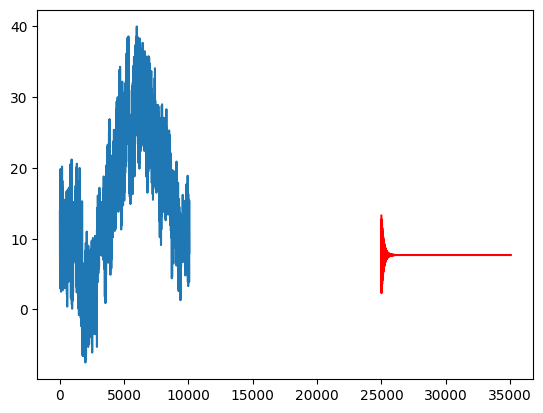

In [21]:
plt.plot(test.values)
plt.plot(y_pred, c='r');